# Importing libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10



# Loading Data


Default:
50,000 training images and 10,000 testing images, so the split ratio is 5:1 or approximately 83.33% training data and 16.67% testing data

In [2]:
# load dataset and perform train/test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 284s 2us/step


## Printing Samples

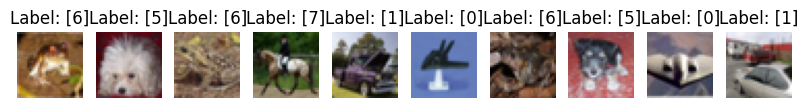

In [4]:

# Var X is number of images to plot
X = 10

# Ensure X is within a valid range
X = min(X, len(X_train))

# Function for ploting images and their labels
def plot_images_with_labels(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title("Label: {}".format(labels[i]))
        plt.axis("off")
    plt.show()

# Get the linear order samples
linear_sample_indices = np.linspace(0, len(X_train) - 1, X, dtype=int)
linear_sample_images = X_train[linear_sample_indices]
linear_sample_labels = y_train[linear_sample_indices]

# Plot the linearly chosen sample of images with their labels
plot_images_with_labels(linear_sample_images, linear_sample_labels)

In [5]:
# Normalizing the Dataset

X_train=X_train/255
X_test=X_test/255

In [10]:
# Creating Validation and Test from 50/50 split of X,Y_test
X_val=X_test[:5000]
y_val=y_test[:5000]

X_test=X_test[5000:]
y_test=y_test[5000:]

In [11]:
print("Length of X_val",len(X_val))
print("Length of y_val",len(y_val))
print("Length of X_test",len(X_test))
print("Length of y_test",len(y_test))

Length of X_val 5000
Length of y_val 5000
Length of X_test 5000
Length of y_test 5000


In [12]:
# Creating Un-labeled dataset 
X_unlabeled=X_train[10000:] 

# Creating Labeled dataset
X_labeled=X_train[:10000]
y_labeled=y_train[:10000]

In [13]:
print("Unlabeled:")
print("Length of X_unlabeled",len(X_unlabeled))
print("Labeled:")
print("Length of X_labeled",len(X_labeled))
print("Length of y_labeled",len(y_labeled))

Unlabeled:
Length of X_unlabeled 40000
Labeled:
Length of X_labeled 10000
Length of y_labeled 10000


# Image rotation

In [14]:
# X_train_0 dataset will contain images rotated by 0 degrees(No rotation)
X_train_0=X_unlabeled.copy()

# X_train_90 dataset 
X_train_90=np.rot90(X_unlabeled, axes=(1,2))

# X_train_180 dataset 
X_train_180=np.rot90(X_unlabeled, 2, axes=(1,2)) # the second parameter is the multiplier: eg. 2*90=180 degrees

# X_train_270 dataset 
X_train_270=np.rot90(X_unlabeled, 3, axes=(1,2))

In [15]:
print("Length of X_train_0",len(X_train_0))
print("Length of X_train_0,90,180,270 (Individually):",len(X_train_90))


Length of X_train_0 40000
Length of X_train_0,90,180,270 (Individually): 40000


In [16]:
# Assigning pseudo-labels to rotated image datasets
y_train_0=np.full((40000), 0)
y_train_90=np.full((40000), 1)
y_train_180=np.full((40000), 2)
y_train_270=np.full((40000), 3)

In [17]:
# Concatenating Datasets
#Training unlabeled data for X variables
X_train_unlabeled_full=np.concatenate((X_train_0, X_train_90, X_train_180, X_train_270), axis=0)
#Training unlabeled data for Y variables
y_train_unlabeled_full=np.concatenate((y_train_0, y_train_90, y_train_180, y_train_270), axis=0)

In [18]:
# number of instances of total rotated array
print("Length of X_train_unlabeled_full",len(X_train_unlabeled_full))
print("Length of y_train_unlabeled_full",len(y_train_unlabeled_full))


Length of X_train_unlabeled_full 160000
Length of y_train_unlabeled_full 160000


## Randomising Order

In [19]:
# Function to call for fixed seed random distribution of data samples over both datasets
# Function has input and output of two arrays a, b
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    np.random.seed(42) #set fixed seed
    p = np.random.permutation(len(a))
    return a[p], b[p]


In [20]:
# Assigning suffled arrays 
X_train_unlabeled_full_shuffled, y_train_unlabeled_full_shuffled = unison_shuffled_copies(X_train_unlabeled_full, y_train_unlabeled_full)

In [22]:
# Testing if arrays values have been randomised
result = np.array_equal(X_train_unlabeled_full_shuffled, X_train_unlabeled_full)

if result == False:
  print("Randomised sequence: Pass")
elif result == True:
  print("Randomised sequence: Failed")


Randomised sequence: Pass


# Validation data

In [28]:
# Creating Validation and Test Dataset for Pretext Task
#X-validation,X-Training
X_rot_val, X_rot_train = X_train_unlabeled_full_shuffled[:10000], X_train_unlabeled_full_shuffled[10000:]
#Y-validation,Y-Training
y_rot_val, y_rot_train = y_train_unlabeled_full_shuffled[:10000], y_train_unlabeled_full_shuffled[10000:]

In [29]:
#Final length of unlabelled dataset
print("Length of X_train_unlabeled_full_shuffled",len(X_rot_train))
print("Length of y_train_unlabeled_full_shuffled",len(y_rot_train))

Length of X_train_unlabeled_full_shuffled 150000
Length of y_train_unlabeled_full_shuffled 150000


In [ ]:
# Reshaping the Inputs
X_rot_val=X_rot_val.reshape(-1, 32, 32, 3)
X_rot_train=X_rot_train.reshape(-1, 32, 32, 3)




## Exporting the Final datasets that we will use for training

Exporting the final datasets to Google Drive into the DATA folder

Pretext Task
```
# Training & Validiation datasets for  Pretext Task
X_rot_train, y_rot_train
&
X_rot_val, y_rot_val
```

Downstream Task
```
# Training & Validiation datasets for Downstream Task
X_labeled, y_labeled
&
X_val, y_val
```







In [ ]:
# Local file path
local_path = '/Users/air/Desktop/FinalProject/Data/Data'

# Save Pretext Task
# UnlabeledTrain
np.save(f'{local_path}/X_rot_train', X_rot_train)
np.save(f'{local_path}/y_rot_train', y_rot_train)

# UnlabeledValidation
np.save(f'{local_path}/X_rot_val', X_rot_val)
np.save(f'{local_path}/y_rot_val', y_rot_val)

# Save Downstream Task
# labeled
np.save(f'{local_path}/X_labeled', X_labeled)
np.save(f'{local_path}/y_labeled', y_labeled)

# labeledValidation
np.save(f'{local_path}/X_val', X_val)
np.save(f'{local_path}/y_val', y_val)
